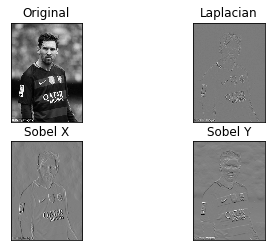

1


In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2

#callback function of trackbar
def onChange(x):
    pass

def onRotate(x):
    pass

# perform the grayscale image conversion
def converttograyscale(im):
    grayValue = 0.07 * im[:,:,2] + 0.72 * im[:,:,1] + 0.21 * im[:,:,0] #formula to get grayscale image
    grayimage = grayValue.astype(np.uint8) #normalized in the range of [0:255] 
    return grayimage


#Read the input image
im = cv2.imread('image.jpg',1);
t = 1
while (t == 1):
    cv2.imshow('Image',im)
    k = cv2.waitKey(0) #wait for the keyboard key to be pressed to perform operations
    if k == 27:         
        cv2.destroyAllWindows()
        t=0
    elif k == ord('i'): #view the original image
        cv2.namedWindow('Original Image')
        cv2.imshow('Original Image',im)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('w'): #write and save the image
        cv2.imwrite('out.jpg',im)
        output = cv2.imread('out.jpg',1)
        cv2.imshow('Output Image',output)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('g'): #convert the color image to grayscale using cvtColor opencv function
        grayimage = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Gray Image',grayimage)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('G'): #convert the color image to grayscale using custom function
        grayscaleimage = converttograyscale(im) #declared the function to perform grayscale conversion
        cv2.imshow('Gray Image',grayscaleimage)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('c'): #seprate the color channel of the image
        r,g,b = cv2.split(im)
        print('Enter 1 for red color channel image, 2 for green color channel image, 3 for blue color channel image')
        value = cv2.waitKey(0)
        if value == ord('1'):
            cv2.imshow('Red',r)
            cv2.waitKey(0)
        if value == ord('2'):
            cv2.imshow('Green',g)
            cv2.waitKey(0)
        if value == ord('3'):
            cv2.imshow('Blue',b)
            cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('s'): #smooth the image using opencv function and trackbar
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        cv2.imshow("Grayscale Image",grayscale)
        cv2.namedWindow('Smoothing Image')
        cv2.createTrackbar('S','Smoothing Image',3,5,onChange) #create trackbar
        while True:
            cv2.imshow("Smoothing Image",grayscale)
            l = cv2.waitKey(1) & 0xFF
            if l == 27:
                break
            s = cv2.getTrackbarPos('S','Smoothing Image') #get current position of the trackbar
            if s>=0 and s%2!=0: # condition to check the filter mtrix is of odd number like 3*3, 5*5 etc
                grayscale = cv2.GaussianBlur(grayscale,(s,s),0) #apply gaussion smoothing on image
        cv2.destroyAllWindows()
        t=1
    elif k == ord('S'): #smooth the image using custom function and trackbar
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        cv2.imshow("Grayscale Image",grayscale)
        cv2.namedWindow('Smoothing Image')
        cv2.createTrackbar('S','Smoothing Image',3,5,onChange) #create trackbar
        while True:
            cv2.imshow("Smoothing Image",grayscale)
            l = cv2.waitKey(1) & 0xFF
            if l == 27:
                break
            s = cv2.getTrackbarPos('S','Smoothing Image') #get current position of the trackbar
            if s>=0 and s%2!=0: #condition to check the filter mtrix is of odd number like 3*3, 5*5 etc
                kernel = np.ones((s,s),np.float32)
                kernel = kernel/(s*s)
                 #create the filter matrix of value 1
                grayscale = cv2.filter2D(grayscale,-1,kernel) #apply 2d filter on grayscale image
        cv2.destroyAllWindows()
        t=1
    elif k == ord('d'): #downsample the image by factor of 2 without smoothing
        new_img = cv.pyrDown(im, 2)
        cv2.imshow("Downsampling without smoothing", new_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('D'): #downsample the image by factor of 2 with smoothing
        blur = cv2.blur(img,(3,3))
        dst = cv.pyrDown(blur, 2) 
        cv2.imshow("Downsampling with smoothing", dst)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('x'): #convolution with X derivative filter
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        x = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=3)
        x = np.absolute(x)
        x = np.uint8(x)
        cv2.imshow('X derivative',x)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('y'): #convolution with Y derivative filter
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        y = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=3)
        y = np.absolute(y)
        y = np.uint8(y)
        cv2.imshow('Y derivative',y)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('m'): #compute gradient based on X and Y derivative of the image
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        m = cv2.Laplacian(grayscale, cv2.CV_64F, ksize=3)
        m = np.absolute(m)
        m = np.uint8(m)
        cv2.imshow('Laplacian',m)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('p'):
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        laplacian = cv2.Laplacian(grayscale,cv2.CV_64F)
        sobelx = cv2.Sobel(grayscale,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(grayscale,cv2.CV_64F,0,1,ksize=5)
        plt.subplot(2,2,1),plt.imshow(grayscale,cmap = 'gray')
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
        plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
        plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
        plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
        plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
        plt.title('Sobel Y'), plt.xticks([]), plt.yticks([]) 
        plt.show()
        print(1)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('r'): #rotate the image by angle theta by converting image into grayscale
        count = 0
        grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        row,col = grayscale.shape
        cv2.namedWindow('Rotational Image')
        cv2.createTrackbar('R','Rotational Image',0,180,onRotate)
        while True:
            cv2.imshow("Rotational Image",grayscale)
            l = cv2.waitKey(1) & 0xFF
            if l == 27:
                break
            r = cv2.getTrackbarPos('R','Rotational Image')
            if r>=0 and r%90==0 and count!=r: 
                count = r
                rotate = cv2.getRotationMatrix2D((col/2,row/2),r,1)
                grayscale = cv2.warpAffine(grayscale,rotate,(col,row))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        t=1
    elif k == ord('h'): #description of the program
        print ('\n A program to perform simple Image manipulation using OpenCV. Press a key to perfrom the operation related to a particular key on the Image.\n Press i to view the Image \n press w to write the image Press w to write and save the image \n Press g to view the grayscale image using conversion filter  \n Press G to view the custom grayscale image \n Press c to view the image in various color channels\n Press s to smooth the grayscale image using trackbar functionality \n Press S to view custom smoothing of image using trackbar functionality \n Press d to downsample the image without smoothing \n Press D to downsample image with smoothing \n Press x to perform convolution with x derivative filter with normalization\n Press y to perform convolution with y derivative filter with normalization \n Press m to perform gradient along x and y derivative of the image \n Press p to convert image to grayscale and plot the gradient vectors \n Press r to rotate the image using trackbar functionality \n')
        cv2.destroyAllWindows()
        t=1



    